# Multiple Linear Regression

Multiple Linear Regression is generalization of simple linear regression 
that regresses a continuous response variable onto multiple features.

Recall SLR of pizza price to diameter. However, number of toppings will
also affect price as the second explanatory variable.  This means SLR
is not a sufficient method, so MLR is used. Given by this model:

$y = \alpha + \beta_1\bullet x_1 + \beta_2\bullet x_2 + ... + \beta_n\bullet x_n$

Each explanatory variable (x) has its own coefficient (beta)
Can also be written  as a vectorization of SLR: $Y = X \bullet\beta$

Parameters - coefficients for the features and intercept
Dividing by matrix = multiplying by inverse of matrix
 to yield a square matrix

In [1]:
from numpy.linalg import inv
from numpy import dot, transpose

X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]
print(dot(inv(dot(transpose(X), X)), dot(transpose(X), y)))

[[1.1875    ]
 [1.01041667]
 [0.39583333]]


In [2]:
# Numpy provides a least squares function to do this more compactly
from numpy.linalg import lstsq

print(lstsq(X, y)[0])

/home/will/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


[[1.1875    ]
 [1.01041667]
 [0.39583333]]


In [4]:
from sklearn.linear_model import LinearRegression

X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(X,y)
X_test = [[8,2], [9,0], [11,2], [16,2], [12,0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model.predict(X_test)
for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))
    print('R-squared: %.2f' % model.score(X_test, y_test))

Predicted: [10.0625], Target: [11]
R-squared: 0.77
Predicted: [10.28125], Target: [8.5]
R-squared: 0.77
Predicted: [13.09375], Target: [15]
R-squared: 0.77
Predicted: [18.14583333], Target: [18]
R-squared: 0.77
Predicted: [13.3125], Target: [11]
R-squared: 0.77


# Polynomial Regression

Models a linear relationship between the response variable and polynomial features. Curvilinear relationships are captured by transforming the features and fitting them to a line similar to linear regression. This example only uses one explanitory variable.

Quadratic regression, or regression with a second order polynomial, is given by the equation: 

$y = \alpha + (\beta_1\bullet x) + (\beta_2\bullet x^2$)

Only one feature is used in quadratic regression, but the equation now has three terms instead of two. Polynomial features transformer can be used to add polynomial features to a feature representation.

/home/will/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/will/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/will/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/will/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


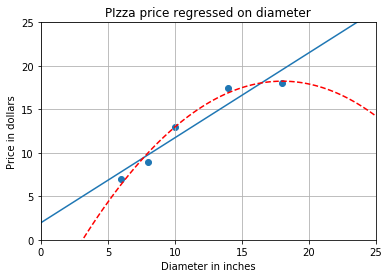

X_train: 
 [[6], [8], [10], [14], [18]]
X_train_quadratic: 
 [[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]
X_test: 
 [[6], [8], [11], [16]]
X-test_quadratic: 
 [[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  11. 121.]
 [  1.  16. 256.]]
Simple linear regression r-squared:  0.809726797707665
Quadratic regression r-squared:  0.8675443656345054


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Define Training and Testing Data
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]

# Instantiate regression model and fit data on train data
# Then predict and plot data using regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)

# Do the same as above with polynomial features
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))

# Plot the data
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r', linestyle='--')
plt.title('PIzza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()
print('X_train: \n', X_train)
print('X_train_quadratic: \n', X_train_quadratic)
print('X_test: \n', X_test)
print('X-test_quadratic: \n', X_test_quadratic)
print('Simple linear regression r-squared: ', regressor.score(X_test, y_test))
print('Quadratic regression r-squared: ', regressor_quadratic.score(X_test_quadratic, y_test))

# REGULARIZATION

*Regularization is a collection of techniqures to prevent overfitting
Adds information in the form of penalty, often against overcomplification.
In essence, it tries to find the simplest model which fits the data.*

*Ridge Regression (AKA Tikhonov Regularization) penalizes large model parameters. Modifies RSS cost function by adding the L2 norm of the coefficients shown [here](https://www.quora.com/In-regression-what-are-some-common-alternatives-to-using-residual-sum-of-squares-RSS-as-your-cost-function-Can-you-describe-the-differences).*

*Lamda controls the strength of the penalty. $\lambda$ = 0 means ridge regression is equal to linear regression.*

*SciKit-Learn also provides Absulute Shrinkage and Selection Operator which
penalizes the coefficients by adding L1 norm to cost function*

*SciKit-Learn also provides an implementation of Elastic Net Regularization
which combines the L1 and L2 penalties used by LASSO and Ridge regularization.*

In [7]:
'''
Predicting the quality of wine based on its physicochoemical attributes.

About the Dataset:
UCI Machine Learning Repository's Wine dataset contains data on 1,599 wines
with 11 attributes. Wine quality is judged by human judges and scores range
from 0-10 (10 being the best). Scores are the response variable.

The dataset can be found at: https://archive.ics.uci.edu/ml/datasets/Wine
'''
import pandas as pd
df = pd.read_csv('winequality-red.csv', sep=';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


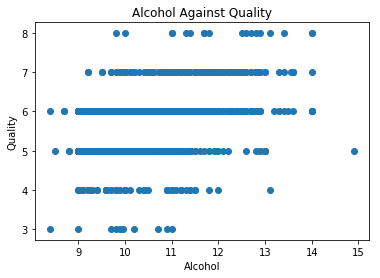

In [8]:
import matplotlib.pylab as plt

plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol Against Quality')
plt.show()

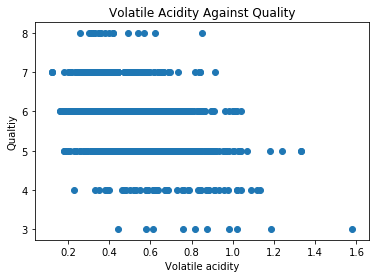

In [9]:
import matplotlib.pylab as plt

plt.scatter(df['volatile acidity'], df['quality'])
plt.xlabel('Volatile acidity')
plt.ylabel('Qualtiy')
plt.title('Volatile Acidity Against Quality')
plt.show()

In [10]:
'''
The correlations below show that higher quality wines have the strongest positive correlation with
alcohol content and the strongest negative correlation with volatile acidity.  This can be observed
in quality row or column.
'''
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [11]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

# Load data using pandas and split response variable from the explanitory variables
# Then randomly split data into test and training sets. By default 25% of data is
# test data and the rest is training data
df = pd.read_csv('./winequality-red.csv', sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train the model and eveluate it on the test set
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print('R-squared: %s' % regressor.score(X_test, y_test))

R-squared: 0.3710278192974984


# Cross Validation

*Now use cross validation to mitigate any variance in the R-squared value due to the random partitioning of data in to test and training sets. This test uses five-fold cross validation meaning that instance is randomly assigned to one of five partitions. Each partition with then train and test the model. The cross_val_score method then returns the R-squared value for each round which can be averaged to generate a more accurate value.*

In [12]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

df = pd.read_csv('./winequality-red.csv', sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
regressor = LinearRegression()
scores = cross_val_score(regressor, X, y, cv=5)
print(scores.mean())
print(scores)

0.2900416288421958
[0.13200871 0.31858135 0.34955348 0.369145   0.2809196 ]


# Gradient Decent

GRADIENT DESCENT is an optimization algorithm that can be used to estimate the local minimum of a function

*SGD Impletmentation: used for regression problems with large numbers of features and to optimize different cost functions to fit different models. RSS (Residual sum of squares) optimized by default.*


In [2]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split training and testing data and stadardize the testing data
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [3]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test.reshape(-1, 1))

regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, X_train, y_train, cv=5)

print('Cross validation r-squared scores: %s' % scores)
print('Average cross validation r-squared score: %s' % np.mean(scores))

regressor.fit(X_train, y_train)
print('Test set r-squared score %s' % regressor.score(X_test, y_test))

/home/will/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/will/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross validation r-squared scores: [0.74443409 0.58870557 0.63834064 0.7758409  0.78419729]
Average cross validation r-squared score: 0.7063036970190322
Test set r-squared score 0.7039753173113397


/home/will/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/will/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both